**Deep Learning - transaction-data**

**Ali Fatta Maulana - 1103223228**

In [1]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=528c13bf-0d36-471e-803c-60e32b2844ec
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:02<00:00, 286MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=3df15982-0c2f-4702-b017-6a2482457e0f
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:05<00:00, 117MB/s]
Download completed


Import Library dan Model

In [3]:
import pandas as pd
import numpy as np
import gc
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Install & Download
!pip install -q gdown
if not os.path.exists('midterm_folder'):
    os.makedirs('midterm_folder')
    print("Download Data...")
    !gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder --quiet

# Fungsi Hemat Memori
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min, c_max = df[col].min(), df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                else:
                    df[col] = df[col].astype(np.float32)
    print(f'RAM berkurang dari {start_mem:.2f} MB ke {df.memory_usage().sum() / 1024**2:.2f} MB')
    return df

memecah data menjadi beberapa bagian agar tidak crash

In [4]:
BASE_PATH = "midterm_folder"

# --- PROSES TRAIN DATA ---
print("1. Memproses Train Data...")
train_df = pd.read_csv(f"{BASE_PATH}/train_transaction.csv")
train_df = reduce_mem_usage(train_df)

# Feature Engineering Waktu
train_df['hour'] = (train_df['TransactionDT'] // 3600) % 24
train_df['day'] = (train_df['TransactionDT'] // (3600 * 24))

# Simpan target dan drop kolom tak perlu
y = train_df['isFraud']
train_df = train_df.drop(['TransactionID', 'TransactionDT', 'isFraud'], axis=1)

# Simpan ke file sementara (Pickle) agar RAM bisa dikosongkan
train_df.to_pickle('temp_train.pkl')
del train_df # HAPUS DARI RAM
gc.collect() # PAKSA BERSIH RAM
print("Train data tersimpan di disk. RAM dibersihkan.\n")

# --- PROSES TEST DATA ---
print("2. Memproses Test Data...")
test_df = pd.read_csv(f"{BASE_PATH}/test_transaction.csv")
test_df = reduce_mem_usage(test_df)

test_df['hour'] = (test_df['TransactionDT'] // 3600) % 24
test_df['day'] = (test_df['TransactionDT'] // (3600 * 24))
test_ids = test_df['TransactionID'] # Simpan ID untuk submission
test_df = test_df.drop(['TransactionID', 'TransactionDT'], axis=1)

# Simpan ke pickle
test_df.to_pickle('temp_test.pkl')
del test_df
gc.collect()
print("Test data tersimpan di disk. RAM dibersihkan.")

1. Memproses Train Data...


/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning:

RAM berkurang dari 1775.15 MB ke 542.35 MB


/tmp/ipython-input-3889591859.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['hour'] = (train_df['TransactionDT'] // 3600) % 24
/tmp/ipython-input-3889591859.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['day'] = (train_df['TransactionDT'] // (3600 * 24))


Train data tersimpan di disk. RAM dibersihkan.

2. Memproses Test Data...


/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-1361284707.py:33: RuntimeWarning:

RAM berkurang dari 1519.24 MB ke 472.59 MB
Test data tersimpan di disk. RAM dibersihkan.


Menggabungkan data yang telah dipecah pecah

In [5]:
print("3. Memuat kembali data yang sudah dikompresi...")
X = pd.read_pickle('temp_train.pkl')
X_test = pd.read_pickle('temp_test.pkl')

print("Handling Missing Values & Label Encoding...")
# Isi NaN
X = X.fillna(-1)
X_test = X_test.fillna(-1)

# Label Encoding (Mengubah teks jadi angka)
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    # Konversi ke string agar aman
    X[col] = X[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    # Fit pada gabungan data
    le.fit(list(X[col]) + list(X_test[col]))
    X[col] = le.transform(X[col])
    X_test[col] = le.transform(X_test[col])

    # Ubah kembali ke int16/int32 agar hemat memori (LabelEncoder outputnya int64)
    if X[col].max() < 32000:
        X[col] = X[col].astype('int16')
        X_test[col] = X_test[col].astype('int16')
    else:
        X[col] = X[col].astype('int32')
        X_test[col] = X_test[col].astype('int32')

print("Preprocessing Selesai. RAM aman.")
gc.collect()

3. Memuat kembali data yang sudah dikompresi...
Handling Missing Values & Label Encoding...
Preprocessing Selesai. RAM aman.


0

Training Model

In [6]:
# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Bersihkan variabel besar X (karena sudah displit)
del X
gc.collect()

# Buat Dataset Pipeline (Streaming data ke GPU)
BATCH_SIZE = 1024
print("Membuat Pipeline Data...")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(2048).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Hapus X_train dan y_train dari RAM
del X_train, y_train, X_val, y_val
gc.collect()

# Class Weights
neg, pos = np.bincount(y)
total = neg + pos
class_weight = {0: (1 / neg) * (total / 2.0), 1: (1 / pos) * (total / 2.0)}

# --- MODEL DEFINITION ---
# Kita gunakan BatchNormalization sebagai pengganti StandardScaler
model = keras.Sequential([
    layers.Input(shape=(X_test.shape[1],)),

    # Layer 1
    layers.BatchNormalization(), # Normalisasi data di dalam GPU
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    # Layer 2
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    # Layer 3
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    # Output
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

# Training
print("Mulai Training...")
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True)],
    class_weight=class_weight,
    verbose=1
)

Membuat Pipeline Data...


/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


Mulai Training...
Epoch 1/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - auc: 0.7864 - loss: 0.5712 - val_auc: 0.8545 - val_loss: 0.3791
Epoch 2/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - auc: 0.8490 - loss: 0.4792 - val_auc: 0.8679 - val_loss: 0.4043
Epoch 3/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - auc: 0.8601 - loss: 0.4615 - val_auc: 0.8746 - val_loss: 0.3795
Epoch 4/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc: 0.8693 - loss: 0.4479 - val_auc: 0.8807 - val_loss: 0.3917
Epoch 5/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - auc: 0.8747 - loss: 0.4389 - val_auc: 0.8855 - val_loss: 0.3843
Epoch 6/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - auc: 0.8799 - loss: 0.4306 - val_auc: 0.8893 - val_loss: 0.3717
Epoch 7/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc: 0.8852 - loss: 0.4217 - val_auc: 0.8918 - val_loss: 0.3504
Epoch 8/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - auc: 0.8899 - loss: 0.4134 - val_auc: 0.8949 - val_loss: 0.3592
Epoch 9/50
462/462 ━━━━━━━━━━━━━━━

Membuat Prediksi

In [7]:
print("Membuat Prediksi...")
# Prediksi batch per batch agar RAM aman
predictions = model.predict(X_test, batch_size=2048)

submission = pd.DataFrame({
    'TransactionID': test_ids,
    'isFraud': predictions.flatten()
})

submission.to_csv('submission_final.csv', index=False)
print("Selesai! File 'submission_final.csv' siap.")

Membuat Prediksi...
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Selesai! File 'submission_final.csv' siap.


Visualisasi

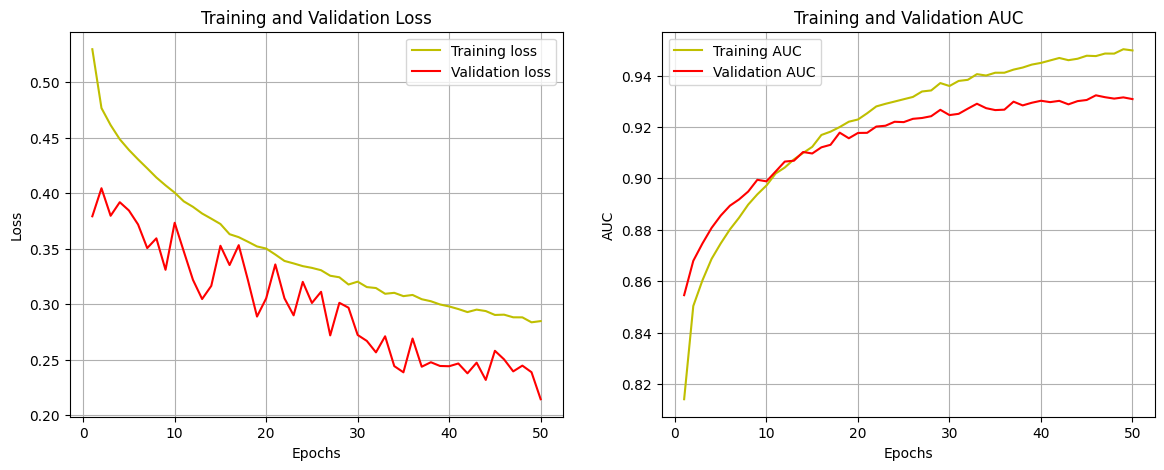


Menghitung evaluasi pada Data Validasi...


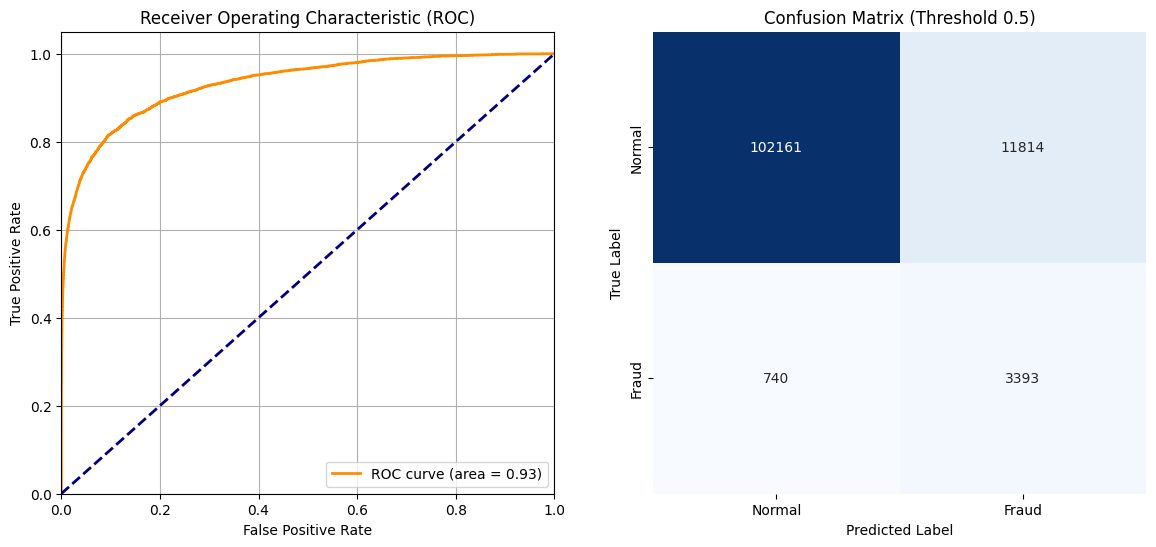


Classification Report:

              precision    recall  f1-score   support

      Normal       0.99      0.90      0.94    113975
       Fraud       0.22      0.82      0.35      4133

    accuracy                           0.89    118108
   macro avg       0.61      0.86      0.65    118108
weighted avg       0.97      0.89      0.92    118108



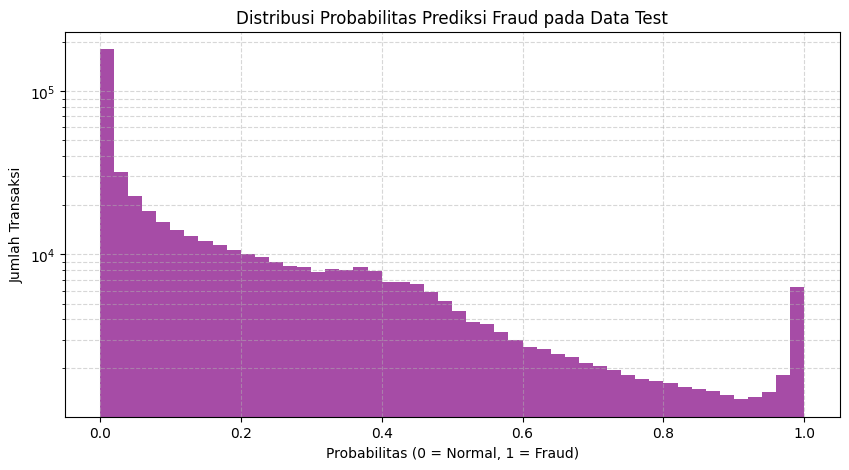

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    auc = history.history['auc']
    val_auc = history.history['val_auc']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot AUC
    plt.subplot(1, 2, 2)
    plt.plot(epochs, auc, 'y', label='Training AUC')
    plt.plot(epochs, val_auc, 'r', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)

    plt.show()

if 'history' in globals():
    plot_training_history(history)
else:
    print("Variabel 'history' tidak ditemukan. Pastikan Anda sudah menjalankan proses training.")

print("\nMenghitung evaluasi pada Data Validasi...")

# Ambil label asli (y_true) dari dataset validasi
# Kita perlu loop dataset karena datanya berbentuk batch
y_val_true = np.concatenate([y for x, y in val_dataset], axis=0)

# Prediksi model pada validation set
y_val_pred = model.predict(val_dataset, verbose=0)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val_true, y_val_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(14, 6))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)

y_val_pred_class = (y_val_pred > 0.5).astype(int)
cm = confusion_matrix(y_val_true, y_val_pred_class)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Threshold 0.5)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])

plt.show()

# Print Laporan Klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_val_true, y_val_pred_class, target_names=['Normal', 'Fraud']))

# Kita lihat apakah model "yakin" (nilai mendekati 0 atau 1) atau "bingung" (nilai di tengah)
plt.figure(figsize=(10, 5))
plt.hist(submission['isFraud'], bins=50, color='purple', alpha=0.7)
plt.title('Distribusi Probabilitas Prediksi Fraud pada Data Test')
plt.xlabel('Probabilitas (0 = Normal, 1 = Fraud)')
plt.ylabel('Jumlah Transaksi')
plt.yscale('log') # Pakai skala log karena jumlah Normal jauh lebih banyak
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()